<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import pandas_ta as ta
import talib
import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'pattern_rsi_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:
from config.dicts_params import dict_custos, dict_valor_lot, dict_path

# Cenários

In [5]:
# win 5 min
{'sl': 300, 'tp': 620, 'LENGTH_RSI': 13, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 350, 'tp': 500, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 400, 'tp': 570, 'LENGTH_RSI': 10, 'RSI_LOW': 22, 'RSI_HIGH': 76}
{'sl': 400, 'tp': 650, 'LENGTH_RSI': 14, 'RSI_LOW': 30, 'RSI_HIGH': 70}

# win 2 min
{'sl': 320, 'tp': 400, 'LENGTH_RSI': 16, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 320, 'tp': 1400, 'LENGTH_RSI': 16, 'RSI_LOW': 30, 'RSI_HIGH': 70}

# wdo 5 min
{'sl': 4, 'tp': 30, 'LENGTH_RSI': 11, 'RSI_LOW': 60, 'RSI_HIGH': 65}
{'sl': 12, 'tp': 28, 'LENGTH_RSI': 9, 'RSI_LOW': 37, 'RSI_HIGH': 80}
{'sl': 12, 'tp': 24, 'LENGTH_RSI': 10, 'RSI_LOW': 25, 'RSI_HIGH': 80}

# wsp
{'sl': 12, 'tp': 35, 'LENGTH_RSI': 15, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 31, 'tp': 33, 'LENGTH_RSI': 15, 'RSI_LOW': 29, 'RSI_HIGH': 52}
{'sl': 15, 'tp': 34, 'LENGTH_RSI': 15, 'RSI_LOW': 28, 'RSI_HIGH': 50}

# USDJPY 5 min
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}

In [145]:
params = {'sl': 800, 'tp': 200, 'LENGTH_RSI': 9, 'RSI_LOW': 28, 'RSI_HIGH': 72}
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}
params = {'sl': 15, 'tp': 28, 'LENGTH_RSI': 10, 'RSI_LOW': 39, 'RSI_HIGH': 63}

In [148]:
# Configurar o backtester
sym = 'WIN@N'
sym = 'WSP@N'
#sym = 'BIT@N'
#sym = 'WDO@N'
#sym = 'EURJPY'
#sym = 'GBPJPY'
#sym = 'USDJPY'



bt = Backtester(
    symbol = sym,
    timeframe = 't2',
    data_ini = '2019-06-25',
    data_fim = '2025-06-30',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)


# Parâmetros da estratégia RSI
LENGTH_RSI = params['LENGTH_RSI']
RSI_LOW = params['RSI_LOW']
RSI_HIGH = params['RSI_HIGH']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "length_rsi": LENGTH_RSI,
        "rsi_low": RSI_LOW,
        "rsi_high": RSI_HIGH,
        'allowed_hours': [10,11,12],
        #'allowed_hours': [6],
        'position_type': "long"
    }
)


# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WSP@N
Timeframe: t2
Período: 2019-06-25 a 2025-06-30

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $64581.50
Retorno Total: $34581.50 (115.27%)
Retorno Anualizado: 17.63%
Volatilidade Anualizada: 17.77%

--- DRAWDOWN ---
Drawdown Máximo: 16.93%
Drawdown Máximo (Valor): $8490.50
Tempo Máximo em Drawdown: 72647.0 períodos
Tempo em Drawdown: 95.61% do total

--- TRADES ---
Total de Trades: 8249
Trades Vencedores: 3741 (45.35%)
Trades Perdedores: 4508 (54.65%)
Saídas por TP: 23.66%
Saídas por SL: 47.33%
Saídas por Tempo: 29.01%

--- RATIOS ---
Sharpe Ratio: 0.992
Sortino Ratio: 2.796
Calmar Ratio: 1.041
Profit Factor: 1.120

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $86.06
Perda Média: $63.75
Win/Loss Ratio: 1.35
Expectancy: $4.19


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

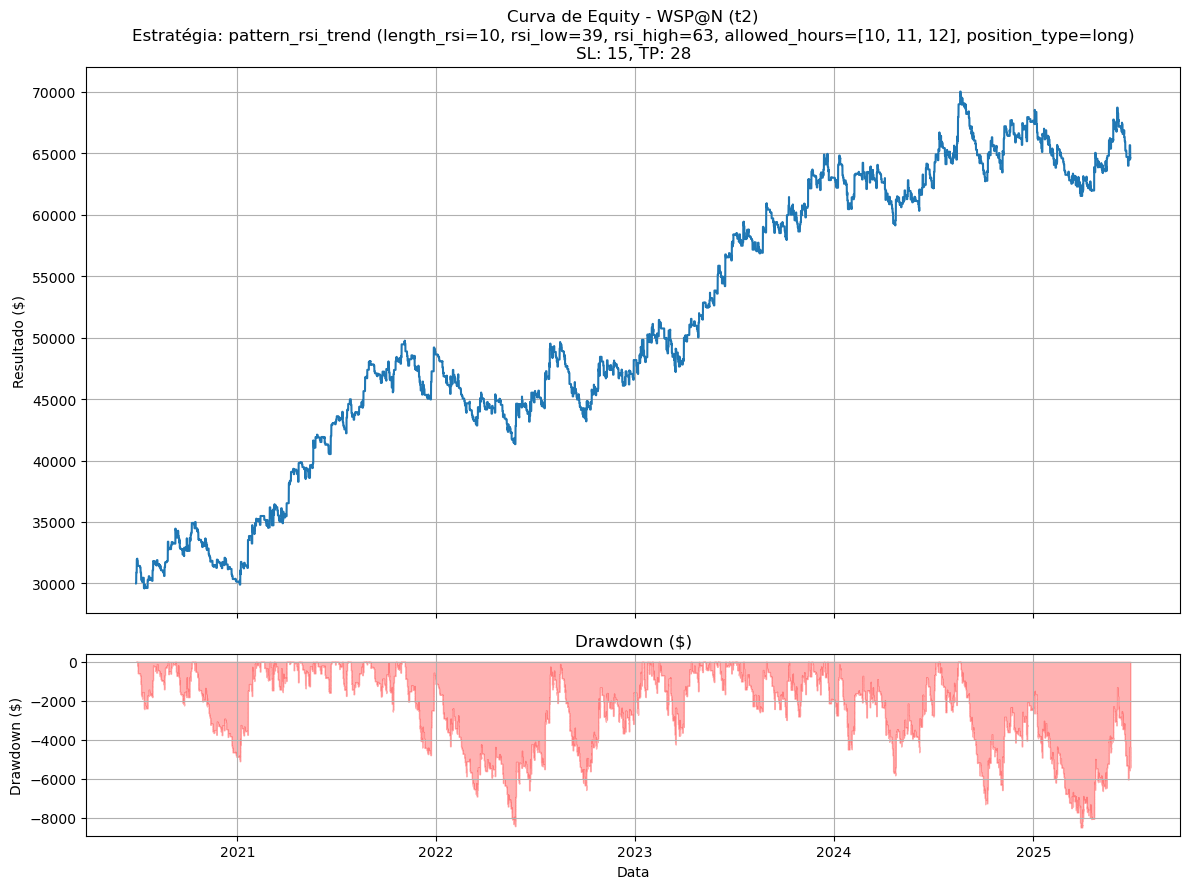

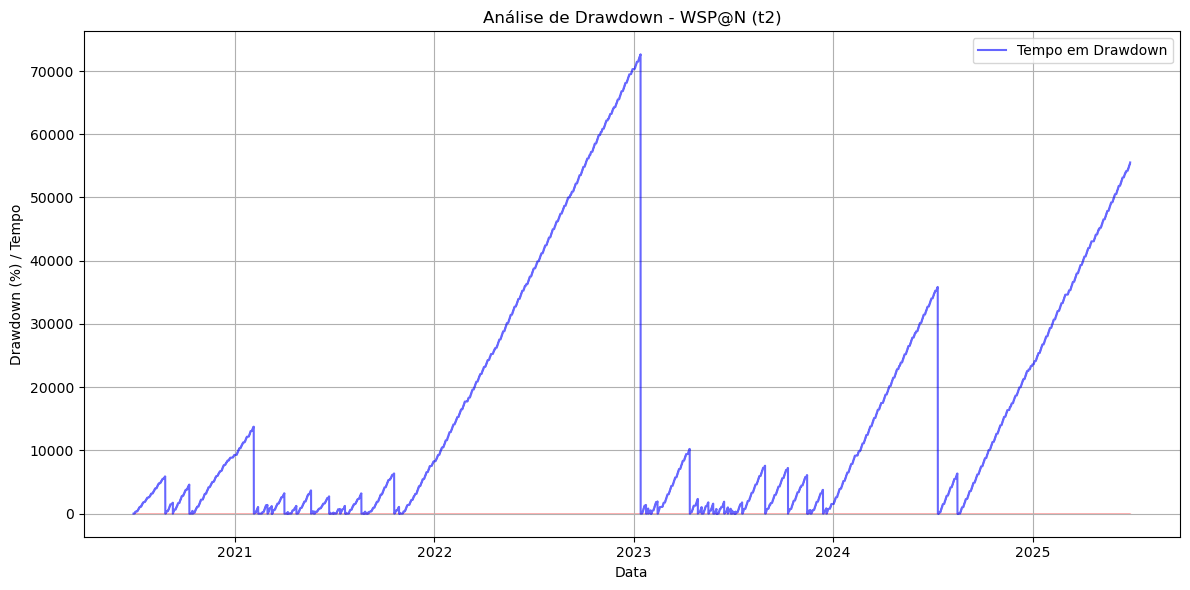

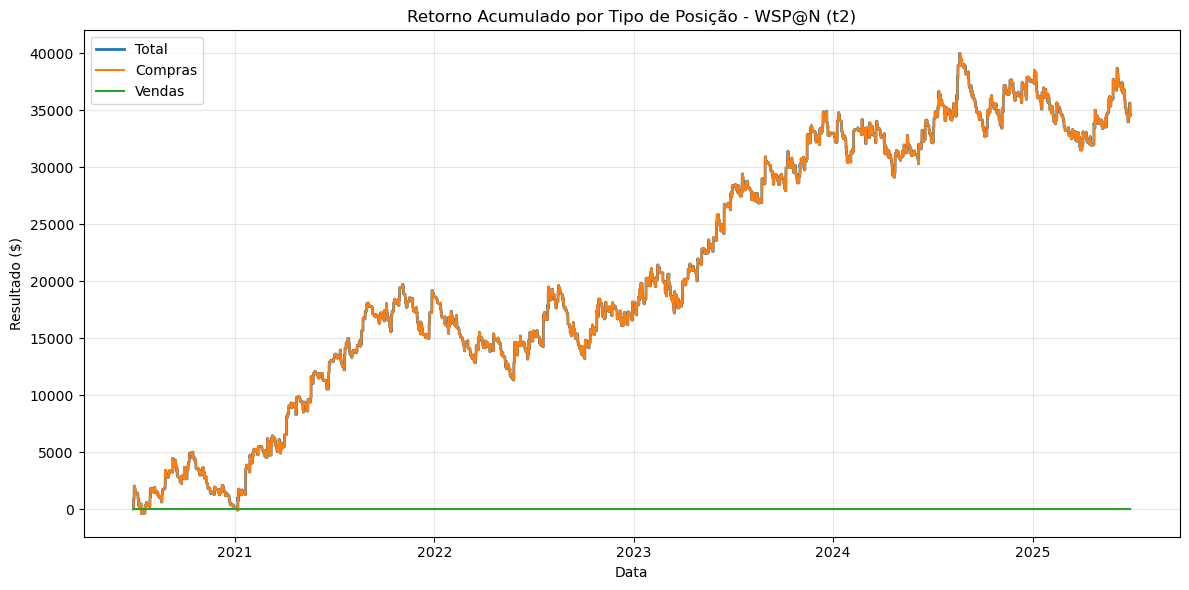

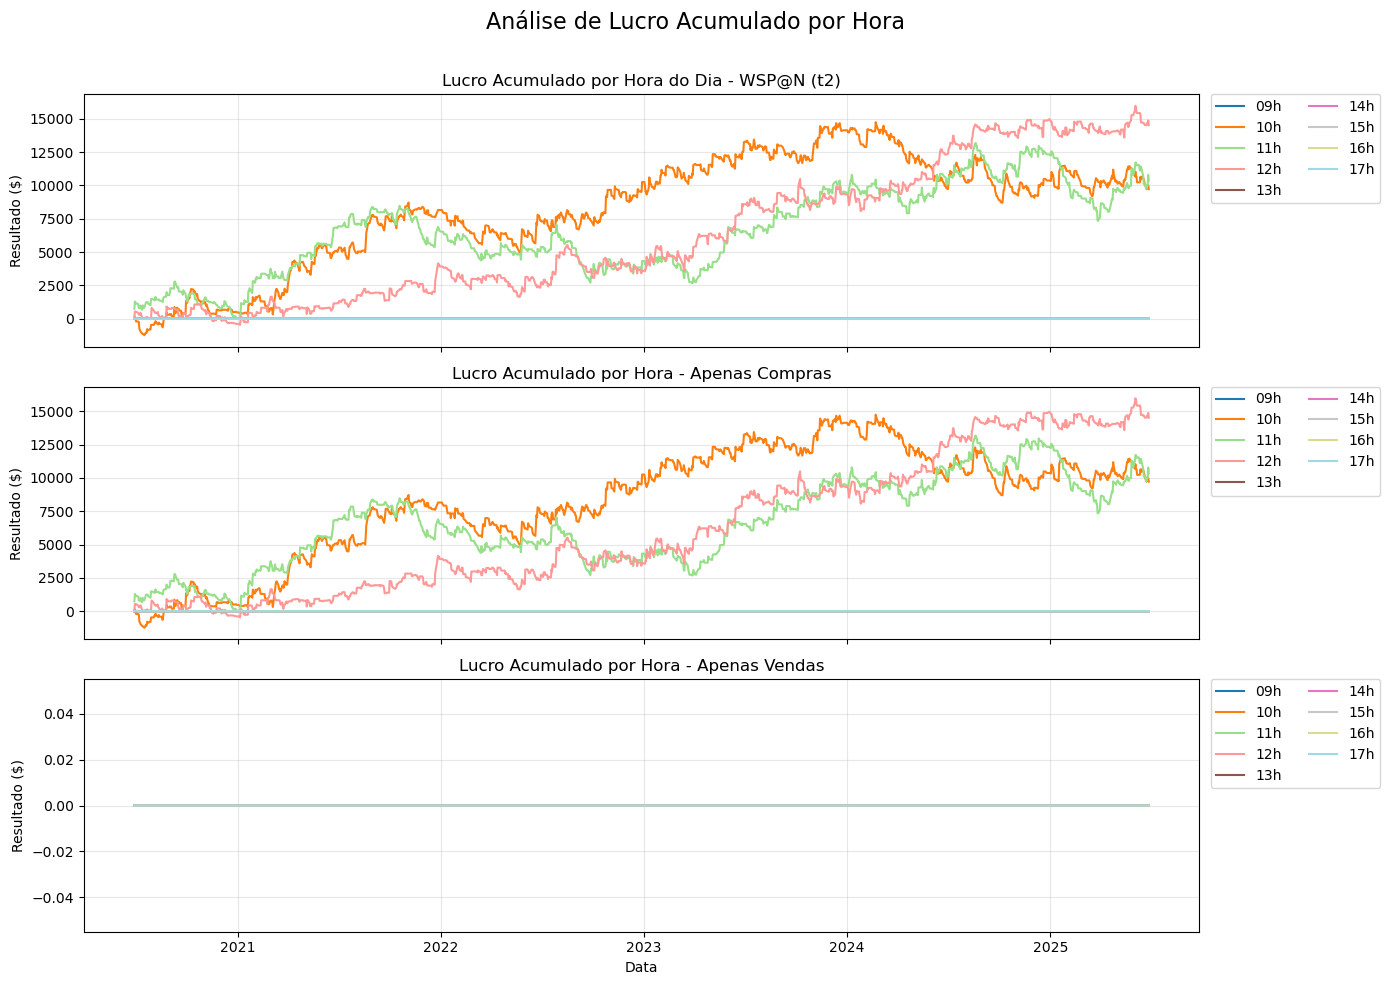

In [149]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

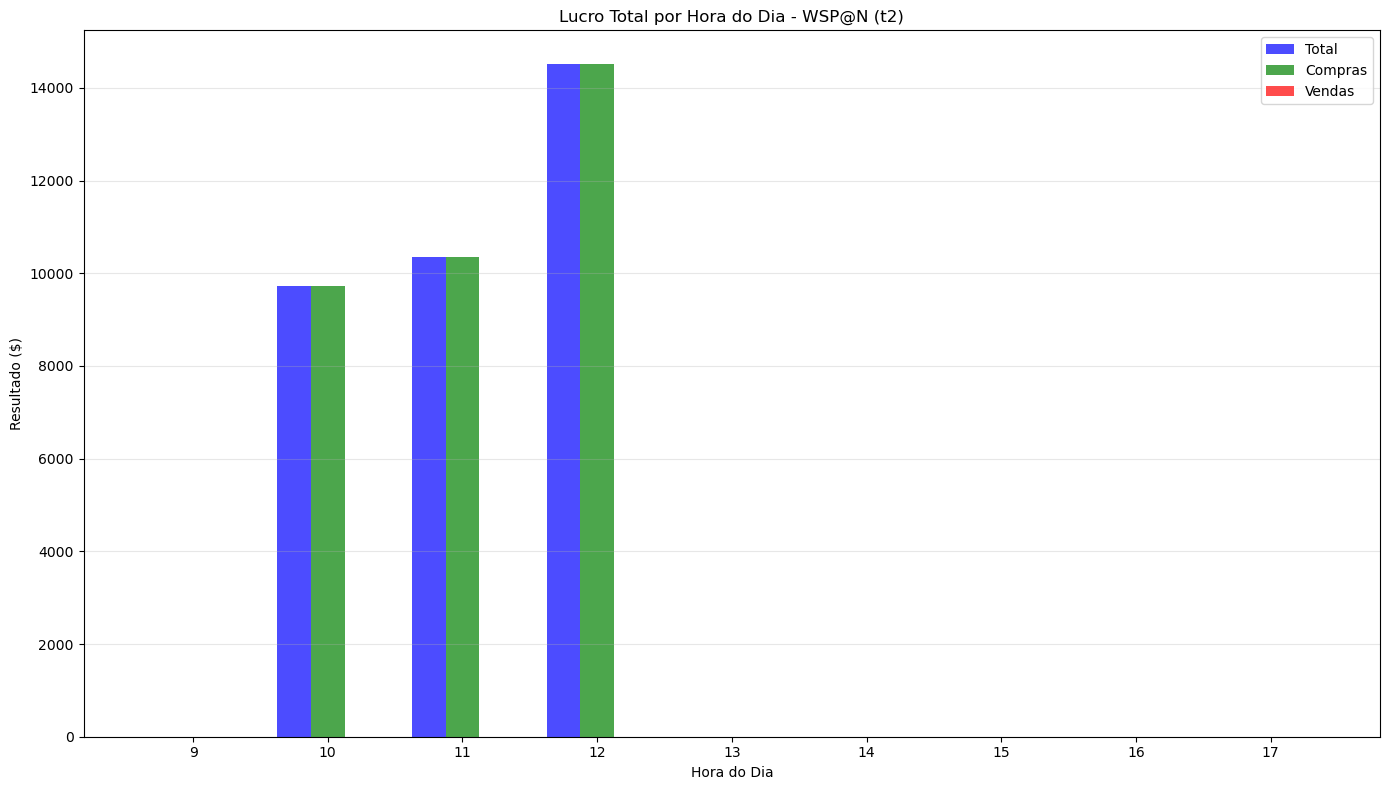

In [150]:
bt.plot_profit_by_hour()

# Otimização

In [9]:
metrics

{'initial_cash': 30000,
 'final_equity': 148663.0,
 'total_return': 118663.0,
 'total_return_pct': 395.54333333333335,
 'annual_return': 31.44768159985931,
 'annual_volatility': 19.604626512650096,
 'total_trades': 4524,
 'win_trades': 1342,
 'loss_trades': 3181,
 'win_rate': 0.29664014146772766,
 'tp_rate': 0.1275419982316534,
 'sl_rate': 0.6821396993810787,
 'time_exit_rate': 0.1903183023872679,
 'profit_factor': 1.3223793417281335,
 'max_drawdown': 0.5930061091215505,
 'max_drawdown_value': 8000.0,
 'max_time_underwater': 14470.0,
 'underwater_rate': 0.9632069316790093,
 'sharpe_ratio': 1.6040949099217656,
 'sortino_ratio': 6.519152395982275,
 'calmar_ratio': 0.5303095721297767,
 'avg_win': 362.70342771982115,
 'avg_loss': 115.71361207167557,
 'win_loss_ratio': 3.13449231448375,
 'expectancy': 26.204086292645513,
 'risk_free_rate': 0.0}

In [89]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WSP@N'
    
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2019-01-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_int('sl', 1, 35),
        tp = trial.suggest_int('tp', 1, 35),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    
    # Parâmetros da estratégia RSI
    LENGTH_RSI = trial.suggest_int('LENGTH_RSI', 4, 16)
    RSI_LOW = trial.suggest_int('RSI_LOW', 20, 50)
    RSI_HIGH = trial.suggest_int('RSI_HIGH', 50, 80)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "length_rsi": LENGTH_RSI,
            "rsi_low": RSI_LOW,
            "rsi_high": RSI_HIGH,
            'allowed_hours': [10,11,12,13]
        }
    )

    
    metrica = metrics['sharpe_ratio']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [90]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=220)

[I 2025-06-28 20:55:10,122] A new study created in memory with name: no-name-fde9fa91-cd99-40fc-9bca-cd8eb338fcfa
[I 2025-06-28 20:55:10,810] Trial 0 finished with value: -0.11641332847268865 and parameters: {'sl': 33, 'tp': 29, 'LENGTH_RSI': 4, 'RSI_LOW': 29, 'RSI_HIGH': 60}. Best is trial 0 with value: -0.11641332847268865.
[I 2025-06-28 20:55:11,498] Trial 1 finished with value: 0.28204632710868577 and parameters: {'sl': 10, 'tp': 24, 'LENGTH_RSI': 15, 'RSI_LOW': 40, 'RSI_HIGH': 60}. Best is trial 1 with value: 0.28204632710868577.
[I 2025-06-28 20:55:12,185] Trial 2 finished with value: -0.27924258255615597 and parameters: {'sl': 35, 'tp': 15, 'LENGTH_RSI': 10, 'RSI_LOW': 34, 'RSI_HIGH': 55}. Best is trial 1 with value: 0.28204632710868577.
[I 2025-06-28 20:55:12,890] Trial 3 finished with value: 0.7490335688009492 and parameters: {'sl': 28, 'tp': 18, 'LENGTH_RSI': 10, 'RSI_LOW': 25, 'RSI_HIGH': 68}. Best is trial 3 with value: 0.7490335688009492.
[I 2025-06-28 20:55:13,590] Trial 

[I 2025-06-28 20:55:34,475] Trial 35 finished with value: 0.6099251425953044 and parameters: {'sl': 33, 'tp': 32, 'LENGTH_RSI': 15, 'RSI_LOW': 20, 'RSI_HIGH': 57}. Best is trial 32 with value: 0.9656283818098413.
[I 2025-06-28 20:55:35,107] Trial 36 finished with value: 0.8869608358728941 and parameters: {'sl': 28, 'tp': 29, 'LENGTH_RSI': 15, 'RSI_LOW': 24, 'RSI_HIGH': 65}. Best is trial 32 with value: 0.9656283818098413.
[I 2025-06-28 20:55:35,735] Trial 37 finished with value: -0.06965800671969458 and parameters: {'sl': 35, 'tp': 22, 'LENGTH_RSI': 13, 'RSI_LOW': 34, 'RSI_HIGH': 70}. Best is trial 32 with value: 0.9656283818098413.
[I 2025-06-28 20:55:36,375] Trial 38 finished with value: 0.7048321499600169 and parameters: {'sl': 30, 'tp': 28, 'LENGTH_RSI': 14, 'RSI_LOW': 22, 'RSI_HIGH': 61}. Best is trial 32 with value: 0.9656283818098413.
[I 2025-06-28 20:55:37,020] Trial 39 finished with value: 0.6067383710914115 and parameters: {'sl': 32, 'tp': 32, 'LENGTH_RSI': 12, 'RSI_LOW': 24,

[I 2025-06-28 20:55:58,363] Trial 72 finished with value: 1.4789319272193127 and parameters: {'sl': 10, 'tp': 12, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:55:58,984] Trial 73 finished with value: 1.0043177831581938 and parameters: {'sl': 10, 'tp': 12, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 78}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:55:59,615] Trial 74 finished with value: 1.1884717492061907 and parameters: {'sl': 5, 'tp': 16, 'LENGTH_RSI': 16, 'RSI_LOW': 21, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:00,272] Trial 75 finished with value: 0.602535105881546 and parameters: {'sl': 2, 'tp': 17, 'LENGTH_RSI': 16, 'RSI_LOW': 21, 'RSI_HIGH': 77}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:00,890] Trial 76 finished with value: -0.9939691811786479 and parameters: {'sl': 4, 'tp': 13, 'LENGTH_RSI': 6, 'RSI_LOW': 23, 'RSI_

[I 2025-06-28 20:56:22,019] Trial 109 finished with value: 1.3899332662570905 and parameters: {'sl': 11, 'tp': 17, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 73}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:22,660] Trial 110 finished with value: 1.5724909429446436 and parameters: {'sl': 9, 'tp': 21, 'LENGTH_RSI': 15, 'RSI_LOW': 22, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:23,310] Trial 111 finished with value: 1.4577917626816248 and parameters: {'sl': 9, 'tp': 25, 'LENGTH_RSI': 15, 'RSI_LOW': 22, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:23,974] Trial 112 finished with value: 1.526101531420337 and parameters: {'sl': 8, 'tp': 22, 'LENGTH_RSI': 15, 'RSI_LOW': 20, 'RSI_HIGH': 77}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:24,610] Trial 113 finished with value: 1.4943440529908742 and parameters: {'sl': 8, 'tp': 22, 'LENGTH_RSI': 15, 'RSI_LOW': 22, '

[I 2025-06-28 20:56:45,579] Trial 146 finished with value: 1.3830881644202904 and parameters: {'sl': 8, 'tp': 28, 'LENGTH_RSI': 14, 'RSI_LOW': 22, 'RSI_HIGH': 80}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:46,209] Trial 147 finished with value: 1.4474371441079912 and parameters: {'sl': 11, 'tp': 23, 'LENGTH_RSI': 13, 'RSI_LOW': 21, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:46,849] Trial 148 finished with value: 1.5189520661029399 and parameters: {'sl': 7, 'tp': 25, 'LENGTH_RSI': 14, 'RSI_LOW': 21, 'RSI_HIGH': 77}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:47,487] Trial 149 finished with value: 1.7651864940126156 and parameters: {'sl': 12, 'tp': 22, 'LENGTH_RSI': 14, 'RSI_LOW': 20, 'RSI_HIGH': 78}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:56:48,116] Trial 150 finished with value: 1.6918834111844627 and parameters: {'sl': 13, 'tp': 22, 'LENGTH_RSI': 14, 'RSI_LOW': 20

[I 2025-06-28 20:57:09,091] Trial 183 finished with value: 1.6918834111844627 and parameters: {'sl': 13, 'tp': 22, 'LENGTH_RSI': 14, 'RSI_LOW': 20, 'RSI_HIGH': 78}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:57:09,719] Trial 184 finished with value: 1.6918834111844627 and parameters: {'sl': 13, 'tp': 22, 'LENGTH_RSI': 14, 'RSI_LOW': 20, 'RSI_HIGH': 78}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:57:10,379] Trial 185 finished with value: 1.774387999307566 and parameters: {'sl': 13, 'tp': 22, 'LENGTH_RSI': 14, 'RSI_LOW': 20, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:57:11,044] Trial 186 finished with value: -0.014348708380220693 and parameters: {'sl': 15, 'tp': 21, 'LENGTH_RSI': 13, 'RSI_LOW': 32, 'RSI_HIGH': 79}. Best is trial 70 with value: 2.4002765692720347.
[I 2025-06-28 20:57:11,661] Trial 187 finished with value: 1.774387999307566 and parameters: {'sl': 13, 'tp': 22, 'LENGTH_RSI': 14, 'RSI_LOW':

In [92]:
study.best_params

{'sl': 13, 'tp': 12, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 79}